# Analysing Titanic dataset

In [70]:
import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [71]:
titanic_df = pd.read_csv("all/train.csv")

In [72]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Who were the passengers on the Titanic ?

In [74]:
gender = {}
male = titanic_df['Sex'] == "male"
female = titanic_df['Sex'] == "female"
gender["male"] = len(titanic_df[male])
gender["female"] = len(titanic_df[female])
gender = pd.Series(gender)
gender

male      577
female    314
dtype: int64

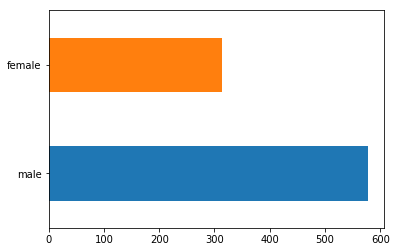

In [75]:
gender.plot("barh")

In [76]:
Pclass = {}
for i in titanic_df.Pclass.unique():
        Pclass[i] = len(titanic_df[titanic_df["Pclass"] == i])
Pclass = pd.Series(Pclass)
Pclass

3    491
1    216
2    184
dtype: int64

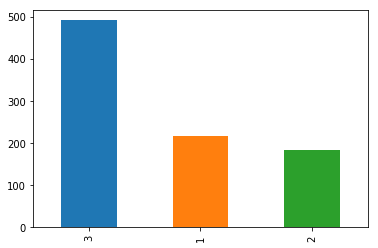

In [77]:
Pclass.plot("bar")

In [78]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return "child"
    return sex

In [79]:
titanic_df["Person"] = titanic_df[["Age","Sex"]].apply(male_female_child, axis =1)

In [80]:
person = {}
for i in titanic_df["Person"].unique():
    person[i] = len(titanic_df[titanic_df["Person"] == i])
    
person = pd.Series(person)
person

male      537
female    271
child      83
dtype: int64

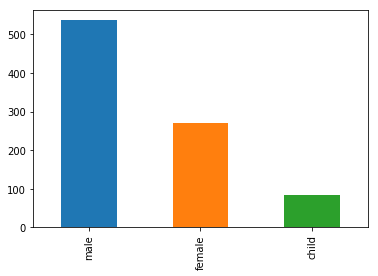

In [81]:
person.plot("bar")

It can also be done directly by:
sns.factorplot("Person",data=titanic_df,kind="count")

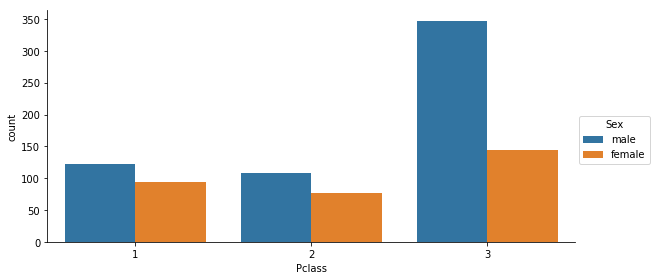

In [86]:
 sns.factorplot("Pclass",data=titanic_df,hue = "Sex",kind="count",aspect = 2)

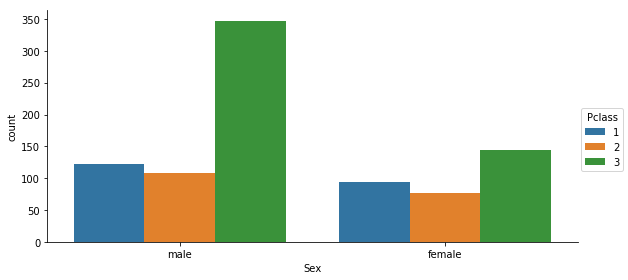

In [87]:
 sns.factorplot("Sex",data=titanic_df,hue = "Pclass",kind="count",aspect = 2)

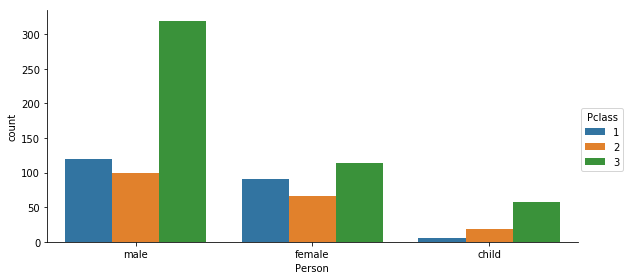

In [88]:
sns.factorplot("Person" , data = titanic_df , hue = "Pclass" , kind = "count" , aspect = 2)

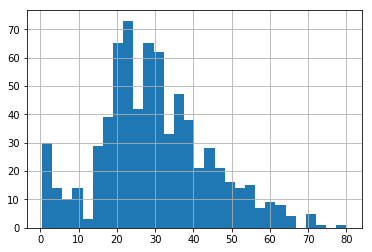

In [89]:
titanic_df["Age"].hist(bins = 30)

In [90]:
titanic_df["Age"].mean()

29.69911764705882

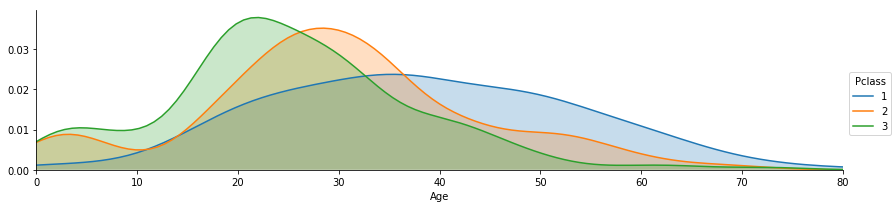

In [91]:
fig = sns.FacetGrid(titanic_df , hue = "Pclass" , aspect = 4)
fig.map(sns.kdeplot,"Age", shade = True )

oldest = titanic_df["Age"].max()    
fig.set(xlim = (0,oldest)) #sets limits


fig.add_legend()

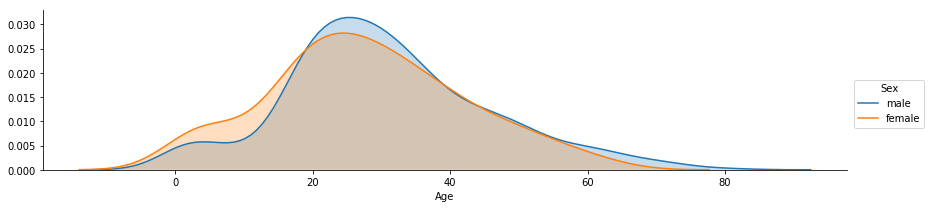

In [92]:
fig = sns.FacetGrid(titanic_df , hue = "Sex" , aspect = 4)
fig.map(sns.kdeplot,"Age" , shade = True)

fig.add_legend()

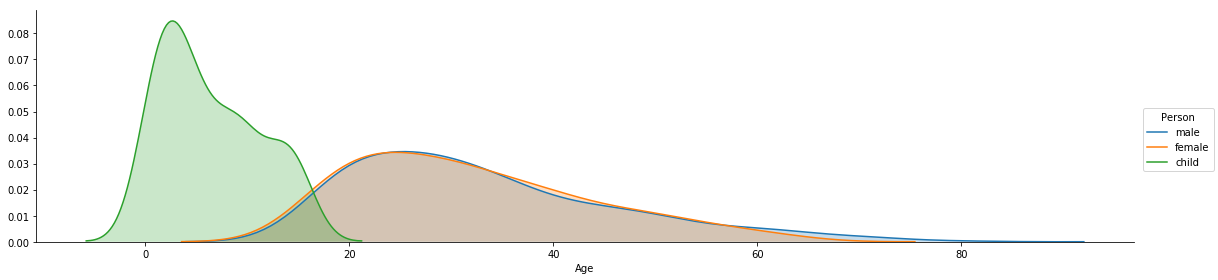

In [93]:
fig = sns.FacetGrid(titanic_df , hue = "Person",size = 4 , aspect = 4)
fig.map(sns.kdeplot , "Age" , shade = True)

fig.add_legend()

## What deck were the passengers on and how does that relate to their class?

In [94]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [150]:
mask = titanic_df.Cabin.notnull()

In [151]:
deck = titanic_df[mask]["Cabin"]

In [152]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [153]:
levels = []
for char in deck:
    levels.append(char[0])

In [154]:
levels[1:5]

['C', 'E', 'G', 'C']

In [155]:
deck_df = pd.DataFrame(levels)
deck_df.columns = ["Cabin"]

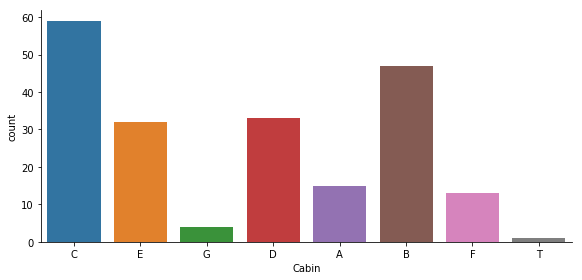

In [101]:
sns.factorplot("Cabin",data = deck_df , kind = "count" , aspect =2)

Removing T level

In [102]:
deck_df["Cabin"] = deck_df[deck_df.Cabin != 'T']

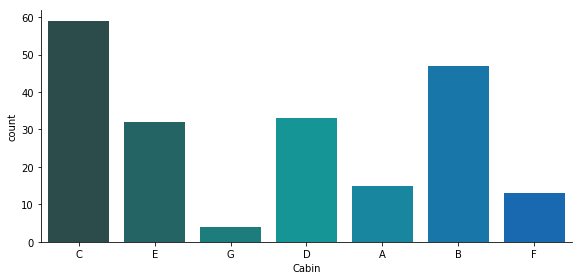

In [103]:
sns.factorplot("Cabin" , data = deck_df , kind = "count" , aspect = 2 , palette = "winter_d" ) #palette sets color

In [104]:
deck_df["class"] = titanic_df["Pclass"]

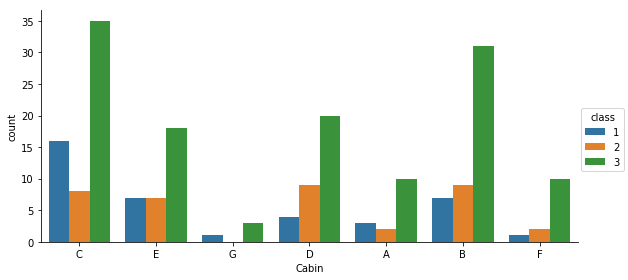

In [105]:
sns.factorplot("Cabin" , data = deck_df , hue = "class" , kind = "count" , aspect =2)

## Where did the passengers came from?

In [106]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


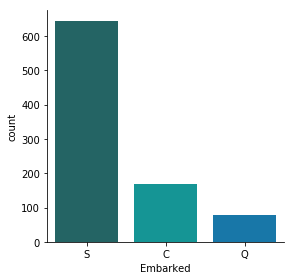

In [107]:
sns.factorplot("Embarked" , data = titanic_df , kind = "count", palette = "winter_d")

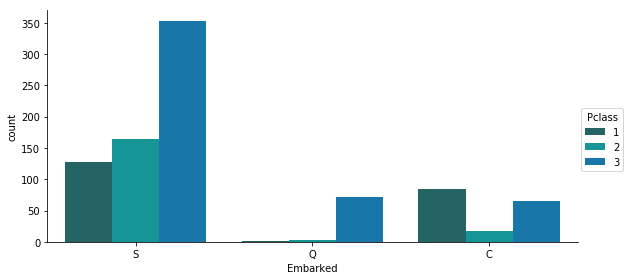

In [108]:
sns.factorplot("Embarked" , data = titanic_df , hue = "Pclass" , kind = "count" , palette = "winter_d" , aspect =2
               , order = ["S" , "Q" , "C"])

## Who was alone and who was with the family?

In [109]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [110]:
titanic_df["Alone"] = titanic_df["SibSp"] + titanic_df["Parch"]

In [111]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male,0


In [112]:
titanic_df["Alone"].loc[titanic_df["Alone"] > 0] = "With Family"
titanic_df["Alone"].loc[titanic_df["Alone"] == 0] = "Alone"

/root/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [113]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


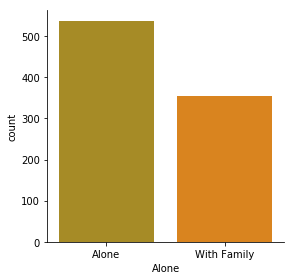

In [114]:
sns.factorplot("Alone" , data = titanic_df , kind = "count" , palette = "hot_d" , order = ["Alone" , "With Family"])

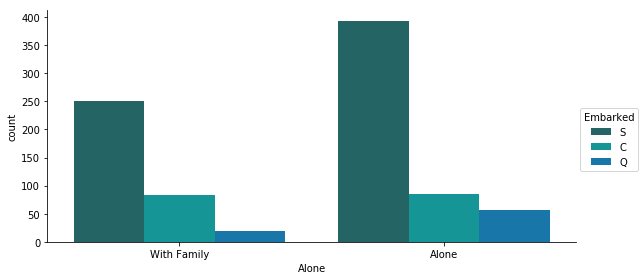

In [115]:
sns.factorplot("Alone", data =  titanic_df , hue = "Embarked" , kind = "count" , aspect =2 , palette = "winter_d")

## What factors helped someone survive the sinking?

In [116]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone


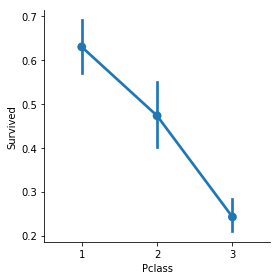

In [117]:
sns.factorplot("Pclass","Survived",data = titanic_df)

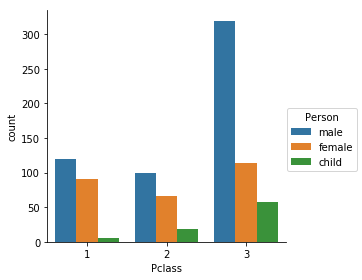

In [118]:
sns.factorplot("Pclass",data = titanic_df,hue = "Person",kind = "count")

### In class 3 ,survived are very less and no. of male are more i.e. that may be the reason for that

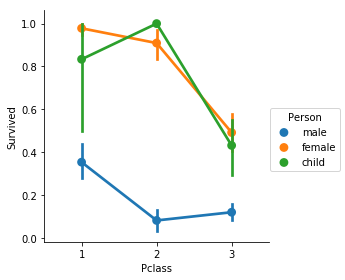

In [119]:
sns.factorplot("Pclass","Survived",data = titanic_df,hue = "Person")

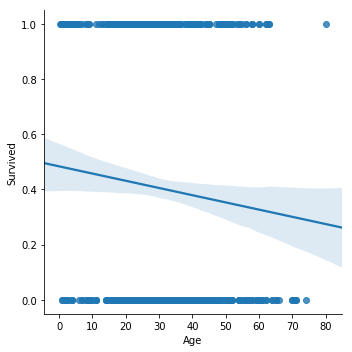

In [120]:
sns.lmplot("Age","Survived",titanic_df)

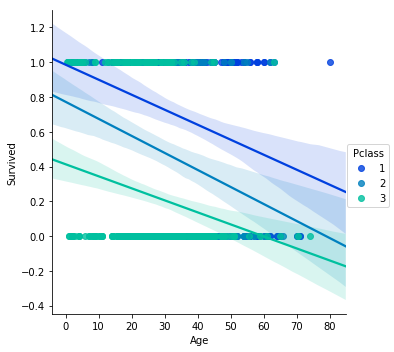

In [121]:
sns.lmplot("Age","Survived",data = titanic_df , hue = "Pclass" , palette = "winter")

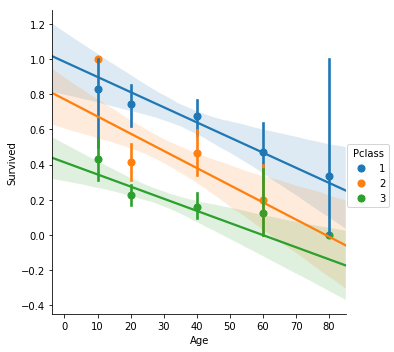

In [122]:
generation = [10,20,40,60,80]

sns.lmplot("Age","Survived" ,titanic_df , hue = "Pclass" ,x_bins=generation )

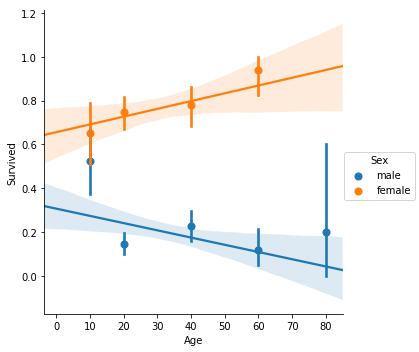

In [123]:
sns.lmplot("Age","Survived",titanic_df,hue = "Sex" ,x_bins= generation)

## Did the deck have an effect on the passengers survival rate? Did this match up your intuition?


In [124]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [149]:
titanic = titanic_df["Cabin"].notnull()
titanic = titanic_df[titanic]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone


In [160]:
titanic['level'] = levels

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
titanic_df = titanic
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,E


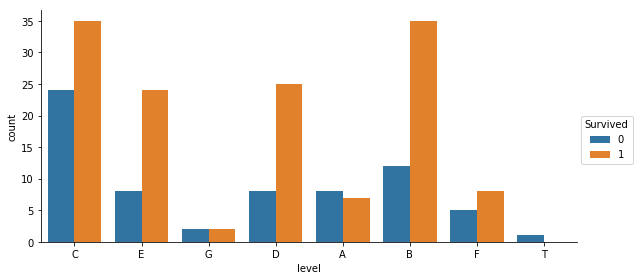

In [173]:
sns.factorplot("level",data = titanic_df,hue ="Survived" , kind = "count" , aspect =2 )

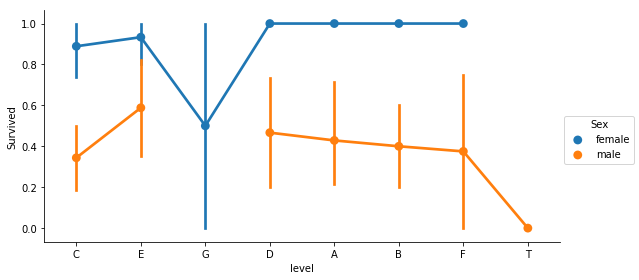

In [175]:
sns.factorplot("level","Survived",hue = "Sex" ,data  =titanic_df , aspect = 2)

## Did having a family member increase the odds of surviving the crash?

In [176]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,E


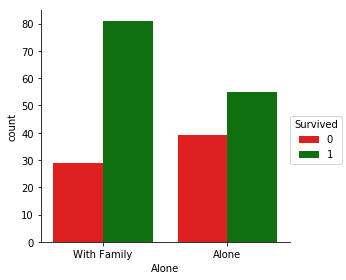

In [182]:
sns.factorplot("Alone",hue = "Survived",data=titanic_df,kind = "count", palette = ["r","g"])

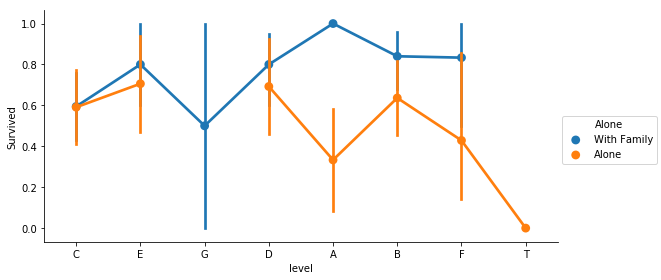

In [186]:
sns.factorplot("level","Survived",data = titanic_df , hue = "Alone" , aspect = 2)